# Customer Personality Analysis
## Joshua Hess

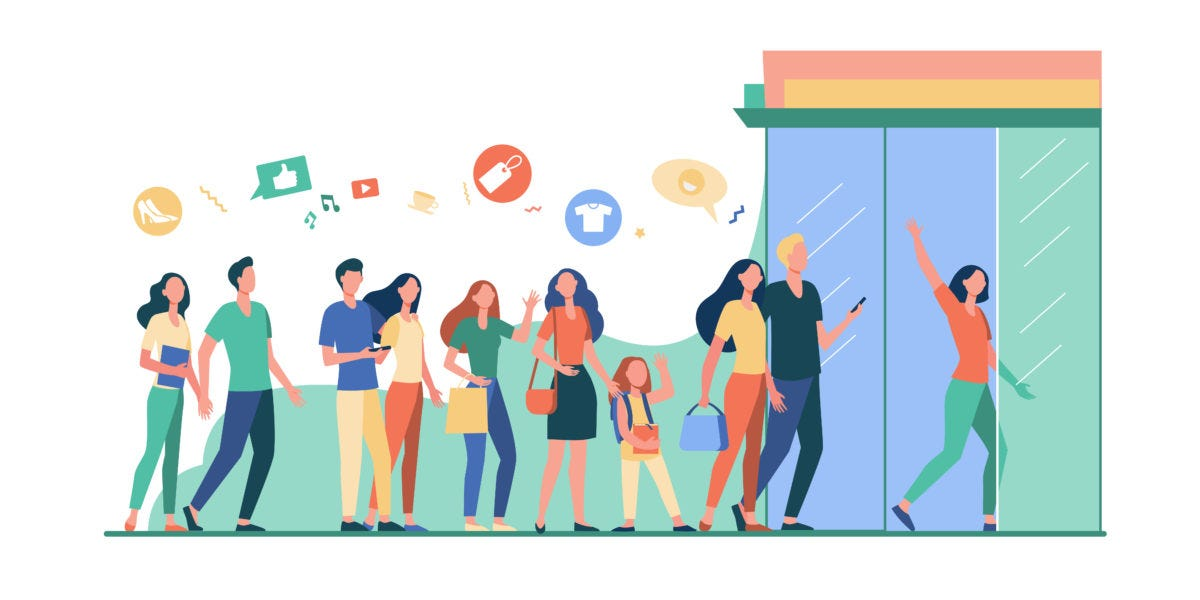

## Introduction

This project's purpose is to examine customer data and perform a customer personality analysis. This can help identify the common groups that customers fall into, and allow us to perform a customer segmentation. A **customer segmentation** is a method where a business can divide their customers into a few specific subgroups. This is helpful because a business can decide how to market differently to each one of these subgroups to maximize the business' overall profit. We will perform this segmentation using a machine learning model called *K-Means Clustering*. 

## How K-Means Clustering Works

*K-Means Clustering* is an unsupervised model, which means it attempts to find patterns or trends within the data. It plots multiple details about a customer population, and then attempts to find "clusters" of customers that are similar to each other. This allows the model to identify each cluster as a subgroup of our customer population. Once we've identified our different subgroups, we can do some analysis to learn more details about each subgroup. 

This project will have the following structure:

1. Loading in and inspecting data.
2. Cleaning data. (handling missing values, checking for outliers)
3. Feature engineering.
4. Data preprocessing for machine learning.
5. Creating K-Means Clustering model.
6. Compare each customer subgroup defined by our K-means model. 

# 1) Loading in and Inspecting Data

Let's first load in our data and take a look at the given variables:

In [1]:
# Import data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mute warnings (UNCOMMENT WHEN FINISHED)
import warnings
warnings.filterwarnings('ignore')

# Load in and inspect data
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep = "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 2) Cleaning Data

## Dealing with Missing Values

In order to deal with missing values, let's first print a summary of which columns have missing values:

In [2]:
# Print data type and missing value info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This dataset is very tidy, with only one variable having missing values: `Income`. Since only 0.012% of the observations have missing values, we can simply drop the observations with missing values. Additionally, we cast the `Dt_Customer` variable to a datetime object for proper dating:

In [3]:
# Drop NA's
data_cleaned = data.dropna()
print("The number of observations after dropping missing values is ", len(data_cleaned))

# Convert Dt_Customer to datetime
data_cleaned['Dt_Customer'] = pd.to_datetime(data_cleaned['Dt_Customer'], format = 'mixed')

The number of observations after dropping missing values is  2216


## Dealing with Outliers

To get an overall look at which features may contain outliers, let's print a numerical summary of each feature:

In [4]:
# Print numerical summaries for each variable
data_cleaned.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In the above output, we can notice two discrepancies:

1. While `Income` has a mean of 52,247.25 and a standard deviation of 25,173.08, it has a maximum value of 666,666.00. To account for this large outlier, we'll restrict `Income` to values of 500,000 USD or less.

2. `Year_Birth` has its earliest year of birth in 1893. We want to restrict the ages to more realistic age ranges, so we'll limit the observations to customers with birth years in or after 1940. 

In the below code block, we update our DataFrame to remove these outliers:

In [5]:
# Remove incomes above 500,000
data_cleaned = data_cleaned[data_cleaned['Income'] <= 500000]
print("The number of observations after dropping Income outliers is ", len(data_cleaned))

# Remove birth years before 1940
data_cleaned = data_cleaned[data_cleaned['Year_Birth'] >= 1940]
print("The number of observations after dropping Birth Year outliers is ", len(data_cleaned))

The number of observations after dropping Income outliers is  2215
The number of observations after dropping Birth Year outliers is  2212


# 3) Feature Engineering

Now that our data is cleaned, we can create some new features to better capture some information in our data. Here is a list of each of the features we'll create:

1. `Age`: Subtract the customer's year of birth from 2021 (when the data was collected) to calculate their age.
2. `Total_Spent`: Adds up the amount spent in each category to track total spending over the span of two years.
3. `Live_With`: Has two possible values 'Alone' or 'Partner' based on the value of `Marital_Status`.
4. `Children`: Adds the amount of kids and teens at home to get the total number of children.
5. `Family_Size`: Adds the value of `Live_With` (1 for alone, 2 for partner) to the number of children to calculate the total family size.
6. `Education`: We will change the Education variable by generalizing the data into three groups: 'Undergraduate', 'Graduate', and 'Postgraduate.' 
7. We will drop redundant features after adding the above features.

Below, we add each of these features and make any other updates as needed:

In [6]:
# Age of customer
data_cleaned['Age'] = 2021 - data_cleaned['Year_Birth']

# Total spent
data_cleaned['Total_Spent'] = data_cleaned['MntWines'] + data_cleaned['MntFruits'] + data_cleaned['MntMeatProducts'] + data_cleaned['MntFishProducts'] + data_cleaned['MntSweetProducts'] + data_cleaned['MntGoldProds']

# Determine 'Live_With' from 'Marital_Status'
data_cleaned['Live_With'] = data_cleaned['Marital_Status'].replace({'Married' : 'Partner', 'Together' : 'Partner', 'Absurd' : 'Alone', 'Widow' : 'Alone', 'YOLO' : 'Alone', 'Divorced' : 'Alone', 'Single' : 'Alone'})

# Total children in household
data_cleaned['Children'] = data_cleaned['Kidhome'] + data_cleaned['Teenhome']

# Total family size
data_cleaned['Family_Size'] = data_cleaned['Live_With'].replace({'Alone' : 1, 'Partner' : 2}) + data_cleaned['Children']

# Generalize education categories
data_cleaned['Education'] = data_cleaned['Education'].replace({'Basic' : 'Undergraduate', '2n Cycle' : 'Undergraduate', 'Graduation' : 'Graduate', 'Master' : 'Postgraduate', 'PhD' : 'Postgraduate'})

# Simplify column names
renamed_cols = {
    'MntWines' : 'Wines',
    'MntFruits' : 'Fruits',
    'MntMeatProducts' : 'Meats',
    'MntFishProducts' : 'Fish',
    'MntSweetProducts' : 'Sweets',
    'MntGoldProds' : 'Gold'
}
data_cleaned = data_cleaned.rename(columns = renamed_cols)

# Drop redundant variables
dropped_cols = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data_cleaned = data_cleaned.drop(dropped_cols, axis = 1)

# Check DataFrame
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meats                2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

Now with our new features prepared and our data cleaned, we're ready to begin our machine learning pipeline.

# Data Preprocessing
